# Модель с общей льготной ипотекой

In [1]:
import mesa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from tqdm import tqdm
from warnings import filterwarnings

sys.path.insert(0, "../") # Для импорта custom_module

from custom_module.market_and_cycle_model.agents import Buyer, Seller, House, Government
from custom_module.market_and_cycle_model.world import WorldModel

filterwarnings("ignore")

# Simulation

In [2]:
model = WorldModel(num_buyers=10000)
model.mortgage_rate = 0.1
model.youth_mortgage_rate = model.mortgage_rate
model.family_mortgage_rate = model.mortgage_rate
for month in tqdm(range(360)):
    model.step()
    if month == 192:
        model.mortgage_rate = 0.08
        model.agents_by_type[Government][0].is_spending = True
        model.agents_by_type[Government][0].mortgage_percent_help = 0.02

100%|██████████| 360/360 [02:58<00:00,  2.01it/s]


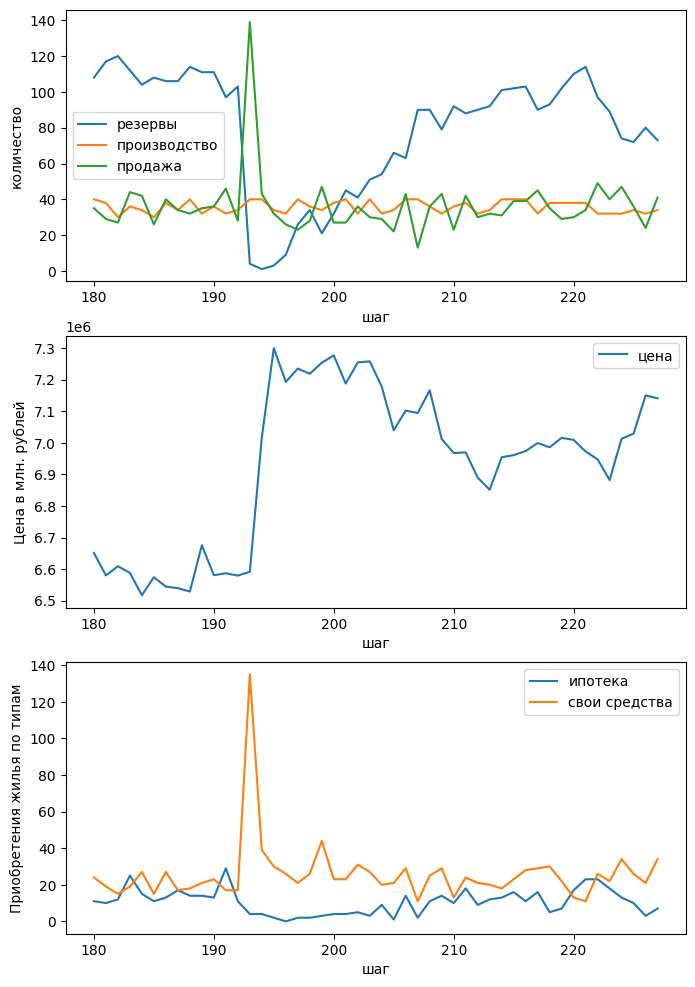

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,12))

ax1.plot(model.datacollector.get_model_vars_dataframe()[['alt_reserve', 'produce', 'sold']][180:228])
ax1.legend(['резервы', 'производство', 'продажа'])
ax1.set_ylabel('количество')
ax1.set_xlabel('шаг')

ax2.plot(model.datacollector.get_model_vars_dataframe()[['sold_price']][180:228])
ax2.legend(['цена'])
ax2.set_ylabel('Цена в млн. рублей')
ax2.set_xlabel('шаг')


ax3.plot(model.datacollector.get_model_vars_dataframe()[['cash_bought', 'mortgages_bought']][180:228])
ax3.legend(['ипотека', 'свои средства'])
ax3.set_ylabel('Приобретения жилья по типам')
ax3.set_xlabel('шаг');


In [8]:
np.mean(model.datacollector.get_model_vars_dataframe()[['sold_price']][192:228])/np.mean(model.datacollector.get_model_vars_dataframe()[['sold_price']][180:192])

np.float64(1.0706287569876032)

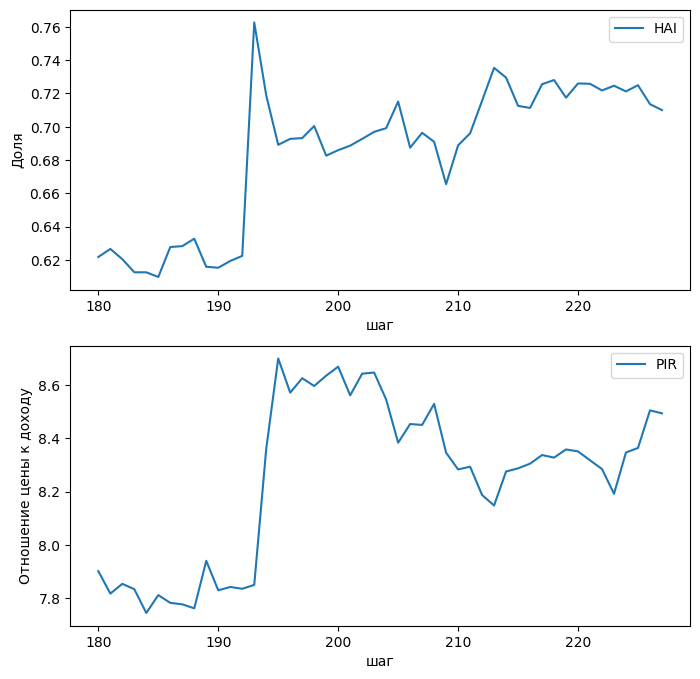

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))

ax1.plot(model.datacollector.get_model_vars_dataframe()[['hai']][180:228])
ax1.legend(['HAI'])
ax1.set_ylabel('Доля')
ax1.set_xlabel('шаг')

ax2.plot(model.datacollector.get_model_vars_dataframe()[['pir']][180:228])
ax2.legend(['PIR'])
ax2.set_ylabel('Отношение цены к доходу')
ax2.set_xlabel('шаг');


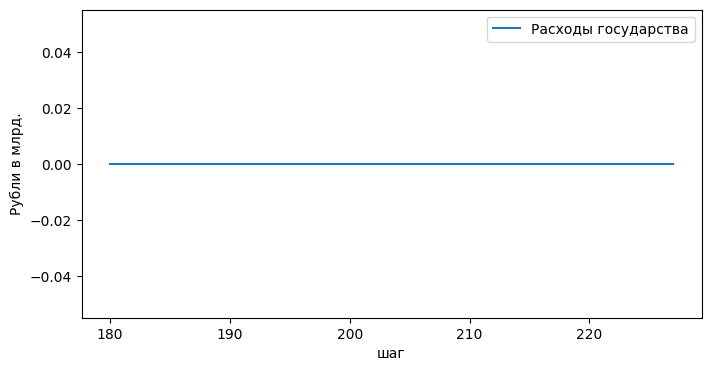

In [10]:
fig, (ax1) = plt.subplots(1, figsize=(8,4))

ax1.plot(model.datacollector.get_model_vars_dataframe()[['government_reserve']][180:228] * -1)
ax1.legend(['Расходы государства'])
ax1.set_ylabel('Рубли в млрд.')
ax1.set_xlabel('шаг');
